# Basic Operations

In this section, we introduce the basic operations of a `cfr.ClimateField`.

Required data to complete this tutorial:

- GISTEMP surface temperature: [gistemp1200_GHCNv4_ERSSTv5.nc](https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz)

Due to the new data fetching feature, the above datasets are not required to be downloaded manually.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)
import numpy as np

2024.12.4


## Load the test netCDF file as a `ClimateField`

In [13]:
fd = cfr.ClimateField().fetch(
    'gistemp1200_GHCNv4_ERSSTv5',  # URL points to the netCDF file OR a supported dataset name
    vn='tempanomaly',  # specify the name of the variable to load
)

fd.da  # check the loaded `xarray.DataArray`

>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...


<xarray.DataArray 'tempanomaly' (time: 1720, lat: 90, lon: 180)> Size: 111MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ],
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ],
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ]],

       [[ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        [ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        [ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        ...,
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ],
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ],
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * time     (time) object 14kB 1880-01-15 00:00:00 ... 2023-04-15 00:00:00
  * lon      (lon) float32 720B 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [14]:
fd = cfr.ClimateField().load_nc(
    './data/gistemp1200_GHCNv4_ERSSTv5.nc.gz',  # path to the netCDF file; compressed data (.nc.gz) is also supported
    vn='tempanomaly',  # specify the name of the variable to load
)

fd.da  # check the loaded `xarray.DataArray`

<xarray.DataArray 'tempanomaly' (time: 1720, lat: 90, lon: 180)> Size: 111MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ],
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ],
        [ 4.14     ,  4.14     ,  4.14     , ...,  4.14     ,
          4.14     ,  4.14     ]],

       [[ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        [ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        [ 1.5699999,  1.5699999,  1.5699999, ...,  1.5699999,
          1.5699999,  1.5699999],
        ...,
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ],
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ],
        [ 3.       ,  3.       ,  3.       , ...,  3.       ,
          3.       ,  3.       ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * time     (time) object 14kB 1880-01-15 00:00:00 ... 2023-04-15 00:00:00
  * lon      (lon) float32 720B 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Time slicing

We may slice a `ClimateField` as like with `xarray.DataArray`:

In [43]:
# get the 1st time point
fd[0].da

<xarray.DataArray 'tas' (lat: 90, lon: 180)>
[16200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
    time     object 1880-01-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [44]:
# get the first 5 time points
fd[:5].da

<xarray.DataArray 'tas' (time: 5, lat: 90, lon: 180)>
[81000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1880-01-15 00:00:00 ... 1880-05-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [55]:
# get discrete data points
fd[[1, 5]].da

<class 'list'>


<xarray.DataArray 'tas' (time: 2, lat: 90, lon: 180)>
[32400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1880-02-15 00:00:00 1880-06-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [53]:
# get all the months in a year
fd['1990'].da

<class 'str'>


<xarray.DataArray 'tas' (time: 12, lat: 90, lon: 180)>
[194400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1990-01-15 00:00:00 ... 1990-12-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [65]:
# get all the months in a list of years
fd[['1990', '1995']].da

<xarray.DataArray 'tas' (time: 24, lat: 90, lon: 180)>
array([[[ 0.35      ,  0.35      ,  0.35      , ...,  0.35      ,
          0.35      ,  0.35      ],
        [ 0.35      ,  0.35      ,  0.35      , ...,  0.35      ,
          0.35      ,  0.35      ],
        [ 0.35      ,  0.35      ,  0.35      , ...,  0.35      ,
          0.35      ,  0.35      ],
        ...,
        [ 3.56      ,  3.56      ,  3.56      , ...,  3.56      ,
          3.56      ,  3.56      ],
        [ 3.56      ,  3.56      ,  3.56      , ...,  3.56      ,
          3.56      ,  3.56      ],
        [ 3.56      ,  3.56      ,  3.56      , ...,  3.56      ,
          3.56      ,  3.56      ]],

       [[-0.69      , -0.69      , -0.69      , ..., -0.69      ,
         -0.69      , -0.69      ],
        [-0.69      , -0.69      , -0.69      , ..., -0.69      ,
         -0.69      , -0.69      ],
        [-0.69      , -0.69      , -0.69      , ..., -0.69      ,
         -0.69      , -0.69      ],
...
        [ 0.5       ,  0.5       ,  0.5       , ...,  0.5       ,
          0.5       ,  0.5       ],
        [ 0.5       ,  0.5       ,  0.5       , ...,  0.5       ,
          0.5       ,  0.5       ],
        [ 0.5       ,  0.5       ,  0.5       , ...,  0.5       ,
          0.5       ,  0.5       ]],

       [[ 0.97999996,  0.97999996,  0.97999996, ...,  0.97999996,
          0.97999996,  0.97999996],
        [ 0.97999996,  0.97999996,  0.97999996, ...,  0.97999996,
          0.97999996,  0.97999996],
        [ 0.97999996,  0.97999996,  0.97999996, ...,  0.97999996,
          0.97999996,  0.97999996],
        ...,
        [-2.98      , -2.98      , -2.98      , ..., -2.98      ,
         -2.98      , -2.98      ],
        [-2.98      , -2.98      , -2.98      , ..., -2.98      ,
         -2.98      , -2.98      ],
        [-2.98      , -2.98      , -2.98      , ..., -2.98      ,
         -2.98      , -2.98      ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1990-01-15 00:00:00 ... 1995-12-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [68]:
# get a time period
fd['1990':'2000'].da

<xarray.DataArray 'tas' (time: 120, lat: 90, lon: 180)>
[1944000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1990-01-15 00:00:00 ... 1999-12-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [67]:
# get a time period with steps
fd['1990':'2000':5].da

<xarray.DataArray 'tas' (time: 24, lat: 90, lon: 180)>
[388800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1990-01-15 00:00:00 ... 1999-08-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [72]:
# get a time period with steps
fd['1990':'2001':5*12].da

<xarray.DataArray 'tas' (time: 3, lat: 90, lon: 180)>
[48600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1990-01-15 00:00:00 ... 2000-01-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Rename the variable

By renaming the variable, we are able to load some presets for visualization.

In [29]:
fd = fd.rename('tas')
fd.da

<xarray.DataArray 'tas' (time: 1720, lat: 90, lon: 180)>
[27864000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1880-01-15 00:00:00 ... 2023-04-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Plot a field map at a time point

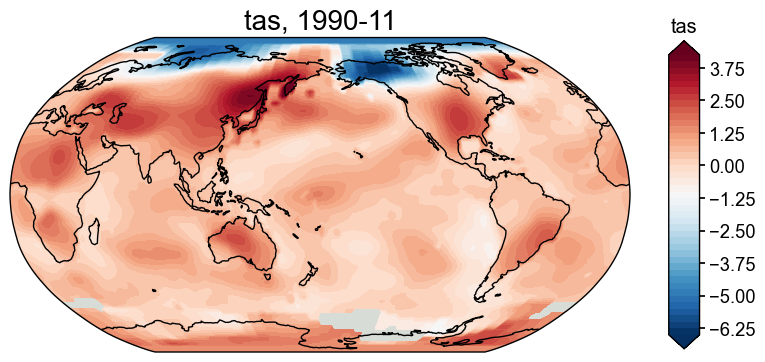

In [30]:
fig, ax = fd['1990-11'].plot()

The default colorbar is not zero-centered.
We may adjust as below:

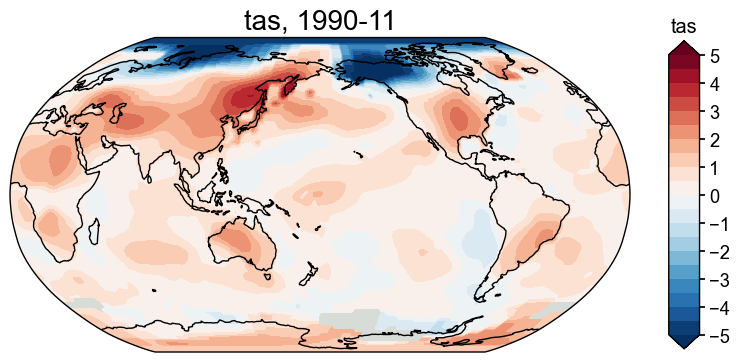

In [31]:
fig, ax = fd['1990-11'].plot(
    levels=np.linspace(-5, 5, 21),       # set levels for the colors
    cbar_labels=np.linspace(-5, 5, 11),  # set the labels for the bar
)

##  Get the anomaly field

We may call the `.get_anom()` method, specifying a reference period, to calculate the anomaly field:

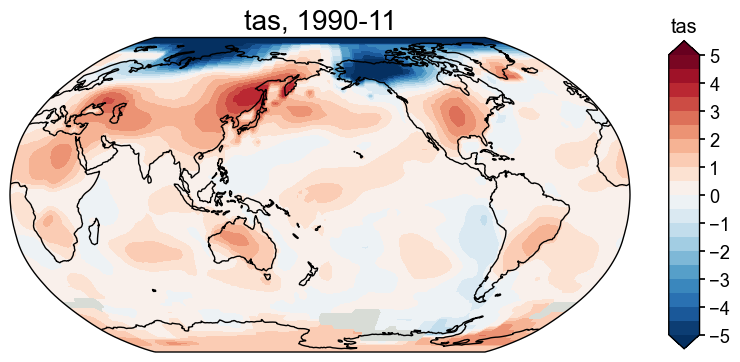

In [32]:
fd_anom = fd.get_anom(ref_period=(1951, 2000))
fig, ax = fd_anom['1990-11'].plot(
    levels=np.linspace(-5, 5, 21),       # set levels for the colors
    cbar_labels=np.linspace(-5, 5, 11),  # set the labels for the bar
    extend='both',                       # extend the bar
)

## Center the field

Similar to calculating the anomaly, sometimes we just want to center the values of a field against a reference period.
With a `cfr.ClimateField`, we may call the `.center()` method to achieve that, again speciying a reference period:

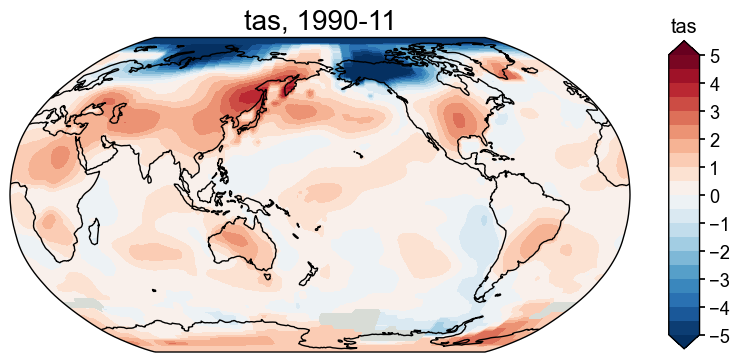

In [33]:
fd_center = fd.center(ref_period=(1951, 2000))
fig, ax = fd_center['1990-11'].plot(
    levels=np.linspace(-5, 5, 21),       # set levels for the colors
    cbar_labels=np.linspace(-5, 5, 11),  # set the labels for the bar
    extend='both',                       # extend the bar
)

## Annualize/Seasonalize a `ClimateField`

It is common that we need to annualize/seasonalize a monthly data.
With a `ClimateField`, we may call the `.annualize()` method with `months` as the argument to achieve the goal.

For instance, if we'd like to calculate the DJF annual data, simply:

In [34]:
fd_djf = fd.annualize(months=[12, 1, 2])
fd_djf.da.time.values

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

In [35]:
fd_djf['1881'].da

<xarray.DataArray 'tas' (time: 1, lat: 90, lon: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) int64 1881
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean
    annualized:    1

In [36]:
fd_djf[-1].da

<xarray.DataArray 'tas' (lat: 90, lon: 180)>
array([[-1.8566667, -1.8566667, -1.8566667, ..., -1.8566667, -1.8566667,
        -1.8566667],
       [-1.8566667, -1.8566667, -1.8566667, ..., -1.8566667, -1.8566667,
        -1.8566667],
       [-1.8566667, -1.8566667, -1.8566667, ..., -1.8566667, -1.8566667,
        -1.8566667],
       ...,
       [ 5.4666667,  5.4666667,  5.4666667, ...,  5.4666667,  5.4666667,
         5.4666667],
       [ 5.4666667,  5.4666667,  5.4666667, ...,  5.4666667,  5.4666667,
         5.4666667],
       [ 5.4666667,  5.4666667,  5.4666667, ...,  5.4666667,  5.4666667,
         5.4666667]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
    time     int64 2023
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean
    annualized:    1

## Regrid a `ClimateField`

Regridding is also a common task.
With a `ClimateField`, we may easily modify the spatial resolution of a field.

In [37]:
fd_regrid = fd.regrid(np.linspace(-90, 90, 41), np.linspace(0, 360, 81))
fd_regrid.da

<xarray.DataArray 'tas' (time: 1720, lat: 41, lon: 81)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,  1.33999991,  1.24000001, ...,  1.30999994,
          1.33999991,         nan],
        [        nan,  4.13999987,  4.13999987, ...,  4.13999987,
          4.13999987,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,  1.56999993,  1.56999993, ...,  1.56999993,
          1.56999993,         nan],
        [        nan,  3.11999989,  2.74000001, ...,  4.02999973,
          3.75      ,         nan],
        ...,
        [        nan,  4.80999994,  4.82999992, ...,  4.46999979,
          4.5999999 ,         nan],
        [        nan,  3.        ,  3.        , ...,  3.        ,
          3.        ,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * time     (time) object 1880-01-15 00:00:00 ... 2023-04-15 00:00:00
  * lat      (lat) float64 -90.0 -85.5 -81.0 -76.5 -72.0 ... 76.5 81.0 85.5 90.0
  * lon      (lon) float64 0.0 4.5 9.0 13.5 18.0 ... 346.5 351.0 355.5 360.0
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Crop a `cfr.ClimateField`

With a `cfr.ClimateField`, we may crop a spatial domain by calling the `.crop()` method, specifying the arguments `lat_min`, `lat_max`, `lon_min`, `lon_max`:

In [38]:
fd_crop = fd.crop(-35, 35, 0, 360)
fd_crop.da

<xarray.DataArray 'tas' (time: 1720, lat: 36, lon: 180)>
[11145600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 1880-01-15 00:00:00 ... 2023-04-15 00:00:00
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Calculate the weighted mean of a sptial area

Lots of climatic indices require to calculate the weighted mean of a spatial area, e.g., the global mean surface temperature (GMST), NINO3.4, etc.

With a `cfr.ClimateField`, we may call the `.geo_mean()` method to calculate that quantity, again specifying the arguments `lat_min`, `lat_max`, `lon_min`, `lon_max`.

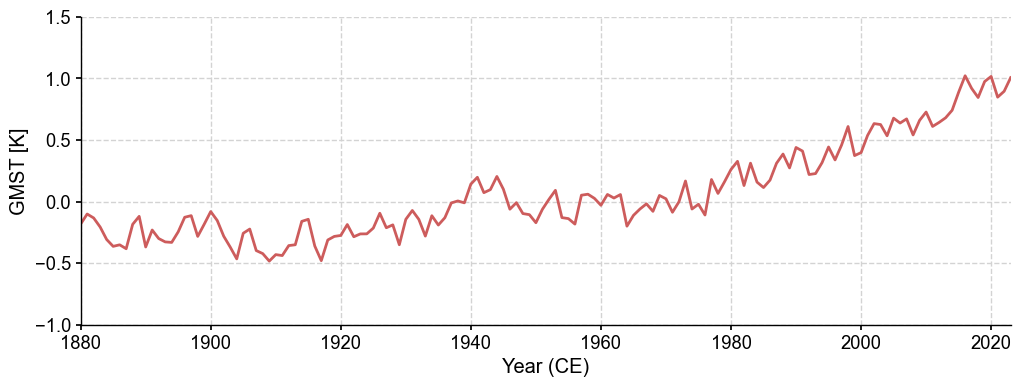

In [39]:
gmst = fd.annualize().geo_mean()  # by default, the area is global
fig, ax = gmst.plot(ylabel='GMST [K]', linewidth=2, ylim=(-1, 1.5))

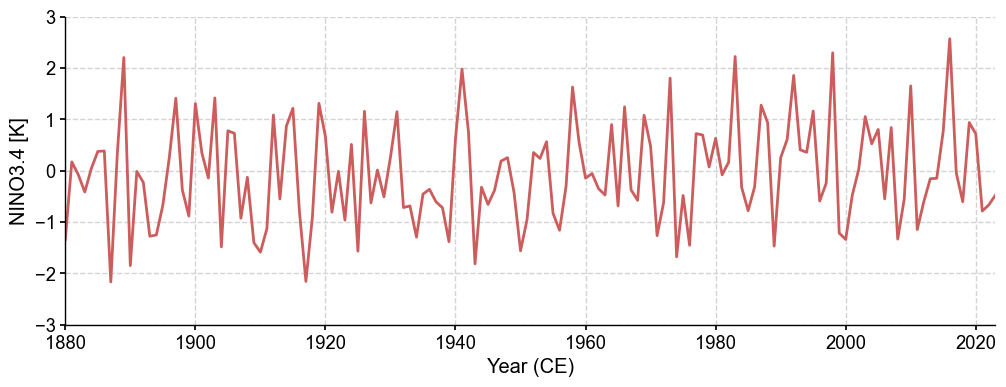

In [40]:
nino34 = fd.annualize(months=[12, 1, 2]).geo_mean(
    lat_min=-5, lat_max=5,
    lon_min=np.mod(-170, 360), lon_max=np.mod(-120, 360)
)
fig, ax = nino34.plot(ylabel='NINO3.4 [K]', linewidth=2, ylim=(-3, 3))

## Validate a field against another

We may compare two `cfr.ClimateField`s by calling the `.compare()` method.
Here as an example, we compare the calendar year annualized field with the JJA annualized field, with three different metrics:

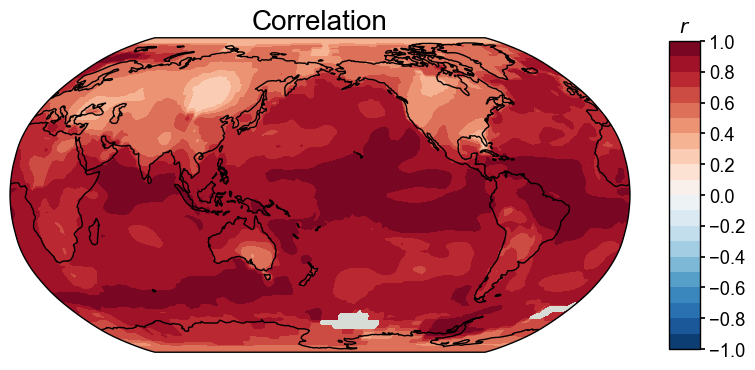

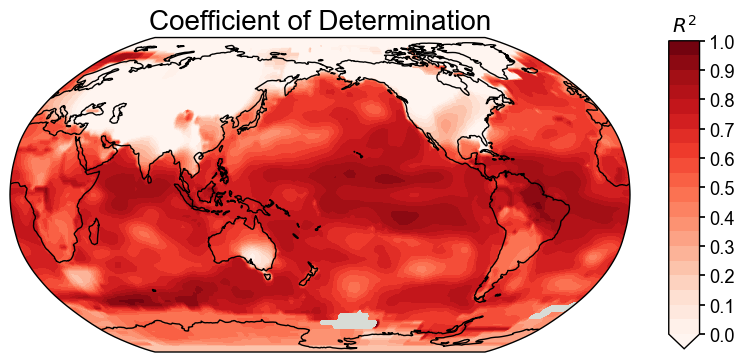

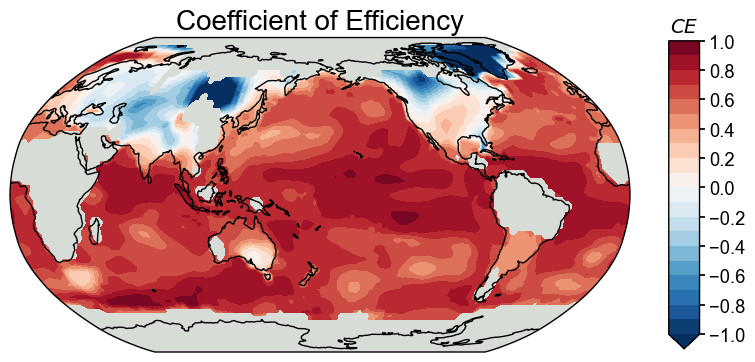

In [15]:
for stat in ['corr', 'R2', 'CE']:
    valid_fd = fd['1880':'2000'].annualize().compare(
        fd['1880':'2000'].annualize(months=[6, 7, 8]), stat=stat)
    fig, ax = valid_fd.plot()